In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt 

In [2]:
refactoring_miner = pd.read_csv("../data/interim/refactoring_miner.csv", encoding='utf8', engine='python')
szz_fault_inducing_commits = pd.read_csv("../data/interim/szz_fault_inducing_commits.csv", encoding='utf8', engine='python')
fault_commits = pd.read_csv("../data/processed/fault_commits.csv", encoding='utf8', engine='python')
fault_commits = fault_commits[fault_commits["FAULT_INDUCING_COMMIT_HASH"].isin(szz_fault_inducing_commits["FAULT_INDUCING_COMMIT_HASH"])]

In [3]:
def get_project_refactor(refactoring_miner):
    projects_refactor = {}

    for i in refactoring_miner.PROJECT_ID.unique():
        aux = {}
        for j in refactoring_miner.REFACTORING_TYPE.unique():
            faults = len(refactoring_miner[(refactoring_miner.PROJECT_ID==i) & (refactoring_miner.REFACTORING_TYPE==j)]["COMMIT_HASH"].unique())
            aux[j] = faults
        projects_refactor[i] = aux
    
    return projects_refactor

In [4]:
def get_project_faults(refactoring_miner, szz_fault_inducing_commits, fault_commits):    
    projects_faults = {}

    for i in szz_fault_inducing_commits.PROJECT_ID.unique():
        aux = {}
        for j in refactoring_miner.REFACTORING_TYPE.unique():
            faults = len(fault_commits[(fault_commits.PROJECT_ID==i) & (fault_commits.REFACTORING_TYPE==j)]["FAULT_INDUCING_COMMIT_HASH"].unique())
            aux[j] = faults
        projects_faults[i] = aux
        
    return projects_faults

In [5]:
def plot_refactor_faults(projects_refactor, projects_faults, project_id):    
    refact = pd.Series(pd.DataFrame(projects_refactor)[project_id], name="Refactor")
    faults = pd.Series(pd.DataFrame(projects_faults)[project_id], name="Faults")

    pd.concat([refact, faults], axis=1).plot(kind='bar', figsize=(18,7), rot=75, width=0.65, fontsize=17, color=('cornflowerblue','gold'),edgecolor = 'silver')
    plt.title(project_id, fontsize=20)
    plt.legend(fontsize=20)
    plt.show()

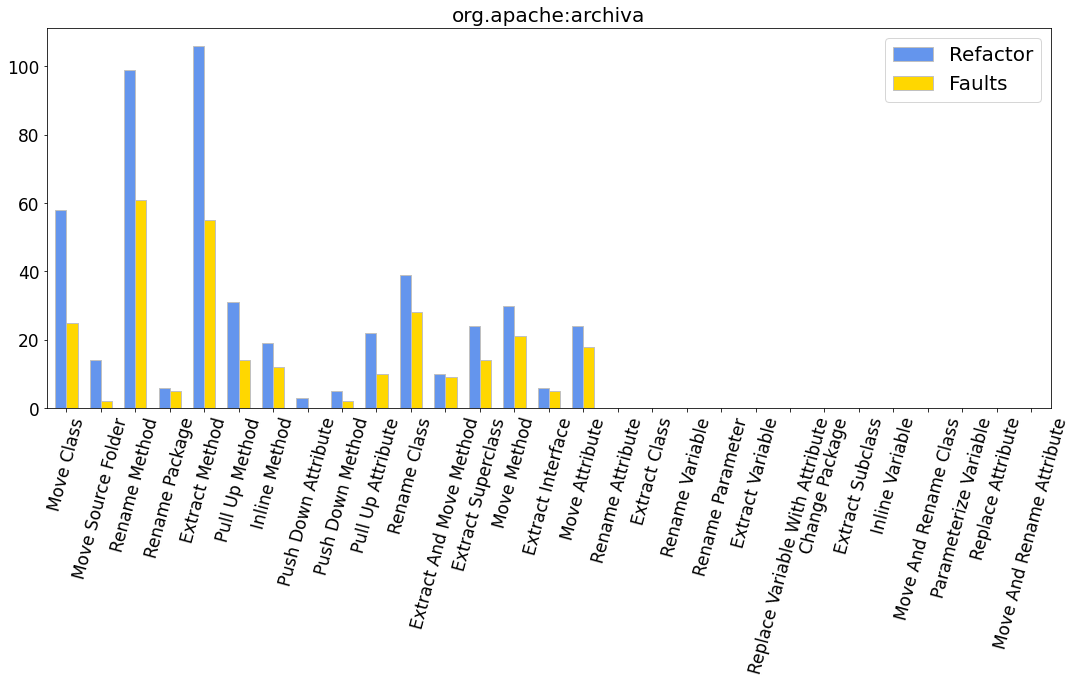

In [6]:
projects_refactor = get_project_refactor(refactoring_miner)
projects_faults = get_project_faults(refactoring_miner, szz_fault_inducing_commits, fault_commits)

plot_refactor_faults(projects_refactor, projects_faults, 'org.apache:archiva')